## Predict IMDB rating of a movie 
#### Prateek Kumar

## Background
A lot of factors such as good directors and actors are driving factors for good movies. However, famous directors and actors can always pull high box-office income but cannot guarantee a high imdb score.

In [1]:
import numpy as np #importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import pylab
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("movie_metadata.csv") #reading input file

### Let's look at the data 

In [3]:
data.columns.values #features in the data

array(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres',
       'actor_1_name', 'movie_title', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes'], dtype=object)

In [4]:
data.shape 

(5043, 28)

##### Data has 5043 data points and 28 features 
##### The imdb_score is the response variable and the remaining 27 are the predictors

#### Response Variable 

In [5]:
pd.DataFrame(data['imdb_score']).skew(axis=0)

imdb_score   -0.741471
dtype: float64

Our response variable "IMDB score" is moderately skewed, let's look at its distribution.

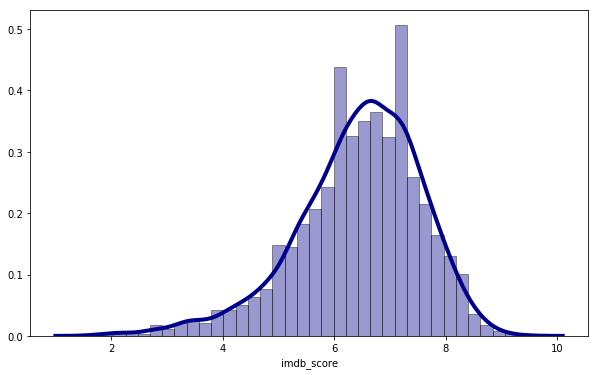

In [6]:
plt.figure(figsize=(10,6))
sns.distplot(data['imdb_score'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

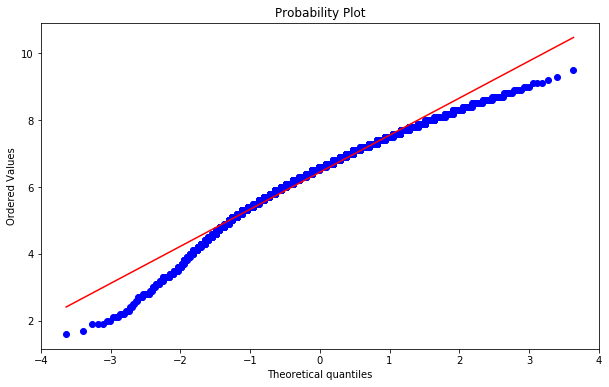

In [7]:
plt.figure(figsize=(10,6))
stats.probplot(data['imdb_score'], dist="norm", plot=pylab) #qq plot
pylab.show()

## Data Exploration 

In [8]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [9]:
data.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

#### The response variable imdb_score is  numerical and for remaining predictors we have a mix of numerical and categorical features.

## Checking duplicate data 

In [10]:
data[data.duplicated()].shape

(45, 28)

We have 45 duplicate rows. Let's remove them

In [11]:
data.drop_duplicates(keep='last',inplace=True)

In [12]:
data.shape

(4998, 28)

Initially we had 5043 data points in which there were 45 duplicate rows, on removing them we now have 4998 observations left.

### Let's now look at each predictors if they need some cleaning

In [13]:
pd.set_option('display.max_columns', None)

### Looking at first 5 rows 

In [14]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [15]:
data.iloc[0]

color                                                                    Color
director_name                                                    James Cameron
num_critic_for_reviews                                                     723
duration                                                                   178
director_facebook_likes                                                      0
actor_3_facebook_likes                                                     855
actor_2_name                                                  Joel David Moore
actor_1_facebook_likes                                                    1000
gross                                                              7.60506e+08
genres                                         Action|Adventure|Fantasy|Sci-Fi
actor_1_name                                                       CCH Pounder
movie_title                                                            Avatar 
num_voted_users                                     

In [16]:
data.iloc[1]

color                                                                    Color
director_name                                                   Gore Verbinski
num_critic_for_reviews                                                     302
duration                                                                   169
director_facebook_likes                                                    563
actor_3_facebook_likes                                                    1000
actor_2_name                                                     Orlando Bloom
actor_1_facebook_likes                                                   40000
gross                                                              3.09404e+08
genres                                                Action|Adventure|Fantasy
actor_1_name                                                       Johnny Depp
movie_title                          Pirates of the Caribbean: At World's End 
num_voted_users                                     

Looking at first 2 rows, we see that all the genres are grouped as one. Also we see a little space at the end of each movie title. Let's check the movie title first.

### Movie Title 

In [17]:
data['movie_title'][0]

'Avatar\xa0'

In [18]:
data['movie_title'][1]

"Pirates of the Caribbean: At World's End\xa0"

We see a special charater at the end of each movie title, this might have been generated during data collection. Let's remove them.

In [19]:
data['movie_title'] = data['movie_title'].str[:-1]

The special character is now removed.

In [20]:
data['movie_title'][0]

'Avatar'

In [21]:
data['movie_title'][1]

"Pirates of the Caribbean: At World's End"

## Genres 

Let's see if genres is related to imdb score.

In [22]:
genre_df = data[['genres','imdb_score']]

Separating genres into different columns.

In [23]:
genre_df['Action'] = genre_df["genres"].str.contains("Action", na=False)
genre_df['Adventure'] = genre_df["genres"].str.contains("Adventure", na=False)
genre_df['Animation'] = genre_df["genres"].str.contains("Animation", na=False)
genre_df['Comedy'] = genre_df["genres"].str.contains("Comedy", na=False)
genre_df['Crime'] = genre_df["genres"].str.contains("Crime", na=False)
genre_df['Family'] = genre_df["genres"].str.contains("Family", na=False)
genre_df['Fantasy'] = genre_df["genres"].str.contains("Fantasy", na=False)
genre_df['Thriller'] = genre_df["genres"].str.contains("Thriller", na=False)
genre_df['Sci-Fi'] = genre_df["genres"].str.contains("Sci-Fi", na=False)
genre_df['Drama'] = genre_df["genres"].str.contains("Drama", na=False)
genre_df['Biography'] = genre_df["genres"].str.contains("Biography", na=False)
genre_df['Documentary'] = genre_df["genres"].str.contains("Documentary", na=False)
genre_df['Film-Noir'] = genre_df["genres"].str.contains("Film-Noir", na=False)
genre_df['History'] = genre_df["genres"].str.contains("History", na=False)
genre_df['Horror'] = genre_df["genres"].str.contains("Horror", na=False)
genre_df['Musical'] = genre_df["genres"].str.contains("Musical", na=False)
genre_df['Mystery'] = genre_df["genres"].str.contains("Mystery", na=False)
genre_df['News'] = genre_df["genres"].str.contains("News", na=False)
genre_df['Romance'] = genre_df["genres"].str.contains("Romance", na=False)
genre_df['Short'] = genre_df["genres"].str.contains("Short", na=False)
genre_df['Sport'] = genre_df["genres"].str.contains("Sport", na=False)
genre_df['War'] = genre_df["genres"].str.contains("War", na=False)
genre_df['Western'] = genre_df["genres"].str.contains("Western", na=False)

In [24]:
genre_df.head()

,genres,imdb_score,Action,Adventure,Animation,Comedy,Crime,Family,Fantasy,Thriller,Sci-Fi,Drama,Biography,Documentary,Film-Noir,History,Horror,Musical,Mystery,News,Romance,Short,Sport,War,Western
0,Action|Adventure|Fantasy|Sci-Fi,7.9,True,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Action|Adventure|Fantasy,7.1,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Action|Adventure|Thriller,6.8,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Action|Thriller,8.5,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Documentary,7.1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [25]:
means=[]
median=[]
for i in genre_df.columns:
    if i!='genres' and i!='imdb_score':
        means.append(genre_df.loc[genre_df[i] == True, 'imdb_score'].mean(axis=0))
        median.append(genre_df.loc[genre_df[i] == True, 'imdb_score'].median(axis=0))

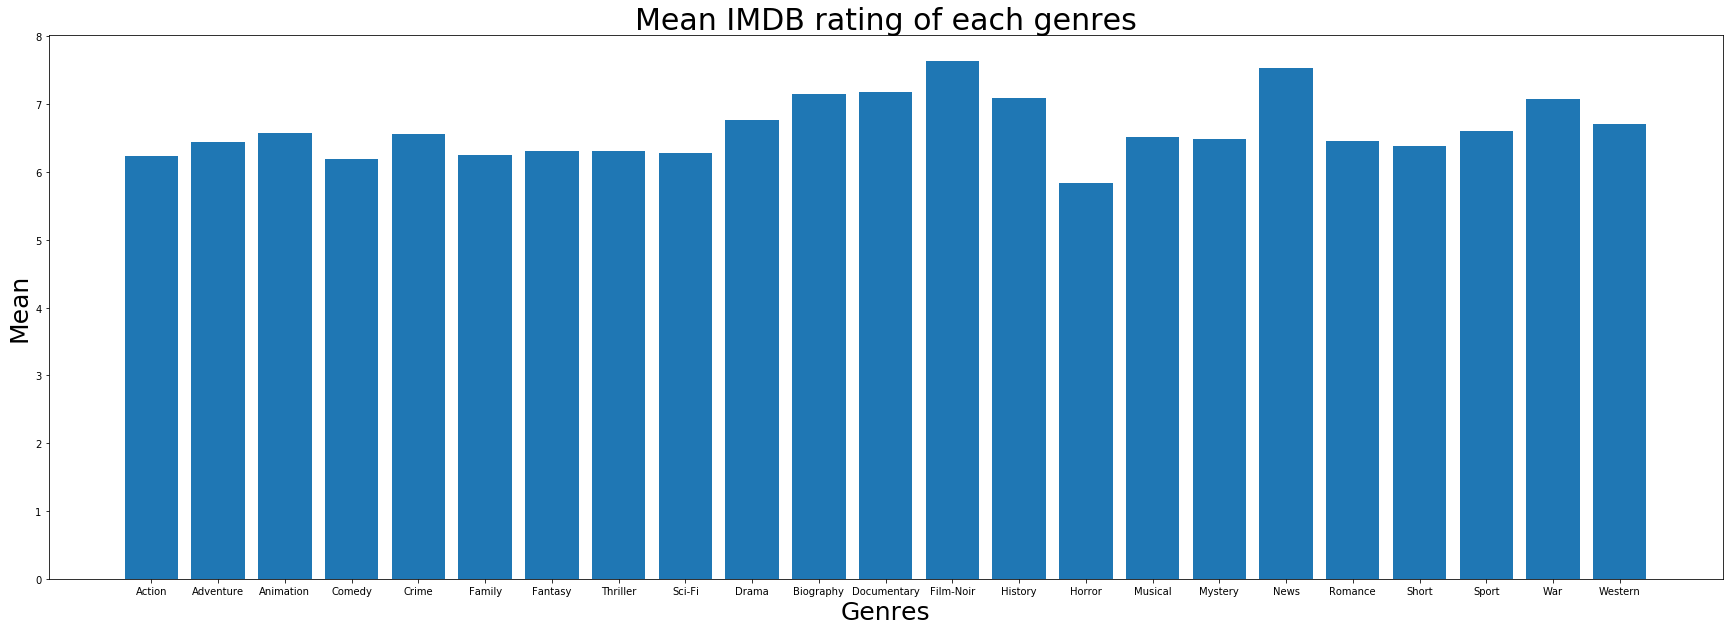

In [26]:
y_pos = np.arange(len(list(genre_df.columns[2:])))
plt.figure(figsize=(30,10))
plt.bar(y_pos, means)
plt.xticks(y_pos, list(genre_df.columns[2:]))
plt.title('Mean IMDB rating of each genres', fontsize=30)
plt.xlabel('Genres', fontsize=25)
plt.ylabel('Mean', fontsize=25)
plt.show()

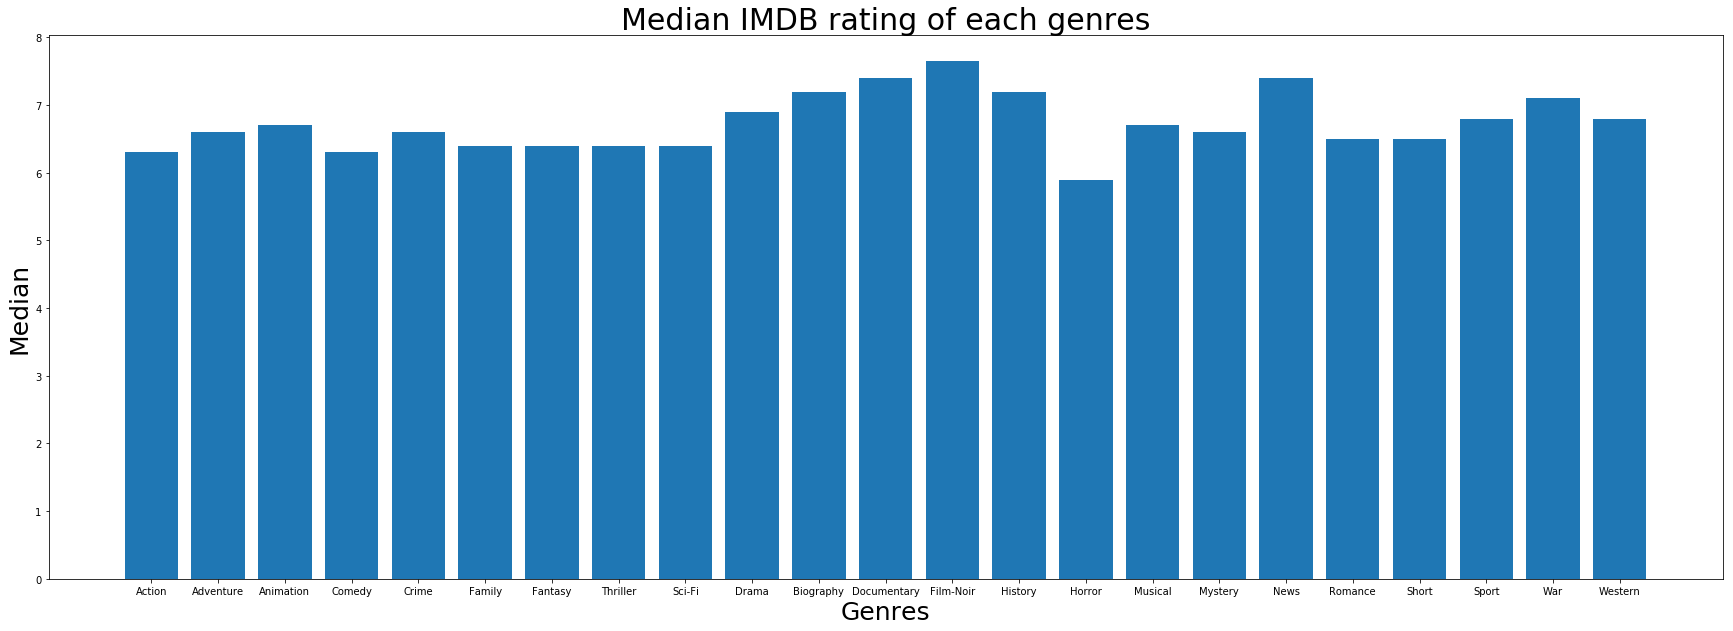

In [27]:
y_pos = np.arange(len(list(genre_df.columns[2:])))
plt.figure(figsize=(30,10))
plt.bar(y_pos, median)
plt.xticks(y_pos, list(genre_df.columns[2:]))
plt.title('Median IMDB rating of each genres', fontsize=30)
plt.xlabel('Genres', fontsize=25)
plt.ylabel('Median', fontsize=25)
plt.show()

#### We see that there is not much difference in the mean and median IMDB ratings.  So I think the predictor “genres” can be removed because it’s not really related to the IMDB score.

In [28]:
data.drop(["genres"], inplace=True, axis=1)

## Data Cleaning 

We will look for the numerical predictors first.

In [29]:
data.isnull().sum() #finding missing values

color                         19
director_name                103
num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        874
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               301
budget                       487
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes           0
dtype: int64

Amongst all columns gross and budget has most missing values, we drop those columns.

In [30]:
data = data[data["gross"].notna()]
data = data[data["budget"].notna()]

In [31]:
data.shape

(3857, 27)

#### Let's look at remaining missing values 

In [32]:
data.isnull().sum()

color                         2
director_name                 0
num_critic_for_reviews        1
duration                      1
director_facebook_likes       0
actor_3_facebook_likes       10
actor_2_name                  5
actor_1_facebook_likes        3
gross                         0
actor_1_name                  3
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                 10
facenumber_in_poster          6
plot_keywords                31
movie_imdb_link               0
num_user_for_reviews          0
language                      3
country                       0
content_rating               51
budget                        0
title_year                    0
actor_2_facebook_likes        5
imdb_score                    0
aspect_ratio                 74
movie_facebook_likes          0
dtype: int64

#### Aspect Ratio 

We now see that aspect ratio has the highest missing values now. Before imputing missing values we have to check if the variable is important or not.

In [33]:
data.aspect_ratio.value_counts()

2.35     1995
1.85     1600
1.37       50
1.78       41
1.66       40
1.33       19
2.39       11
2.20       10
2.40        3
2.76        3
2.00        3
1.75        2
2.24        1
1.18        1
2.55        1
1.77        1
16.00       1
1.50        1
Name: aspect_ratio, dtype: int64

Most of the aspect_ratio values are 2.35 and 1.85 so we group other aspect ratio as others and compare their results. Here we will calculate their means and see if there is significant difference.

In [34]:
data['aspect_ratio'].fillna(0, inplace=True) #replacing NA values with 0

In [35]:
data.loc[data['aspect_ratio'] == 2.35, 'imdb_score'].mean(axis=0)

6.50847117794486

In [36]:
data.loc[data['aspect_ratio'] == 1.85, 'imdb_score'].mean(axis=0)

6.373937500000016

In [37]:
data.loc[~data['aspect_ratio'].isin([2.35, 1.85]), 'imdb_score'].mean(axis=0)

6.672519083969459

From the means of imdb score for different aspect ratios, we can see there is no significant difference, all the means fall are almost the same. So, removing this variable won’t affect our following analysis.

In [38]:
data.drop(["aspect_ratio"], inplace=True, axis=1)

#### Replacing NA with mean

We have 15 numeric columns, we replace their NA values with their means.

In [39]:
data['num_critic_for_reviews'] = data['num_critic_for_reviews'].fillna((data['num_critic_for_reviews'].mean()))
data['duration'] = data['duration'].fillna((data['duration'].mean()))
data['actor_3_facebook_likes'] = data['actor_3_facebook_likes'].fillna((data['actor_3_facebook_likes'].mean()))
data['actor_1_facebook_likes'] = data['actor_1_facebook_likes'].fillna((data['actor_1_facebook_likes'].mean()))
data['facenumber_in_poster'] = data['facenumber_in_poster'].fillna((data['facenumber_in_poster'].mean()))
data['actor_2_facebook_likes'] = data['actor_2_facebook_likes'].fillna((data['actor_2_facebook_likes'].mean()))

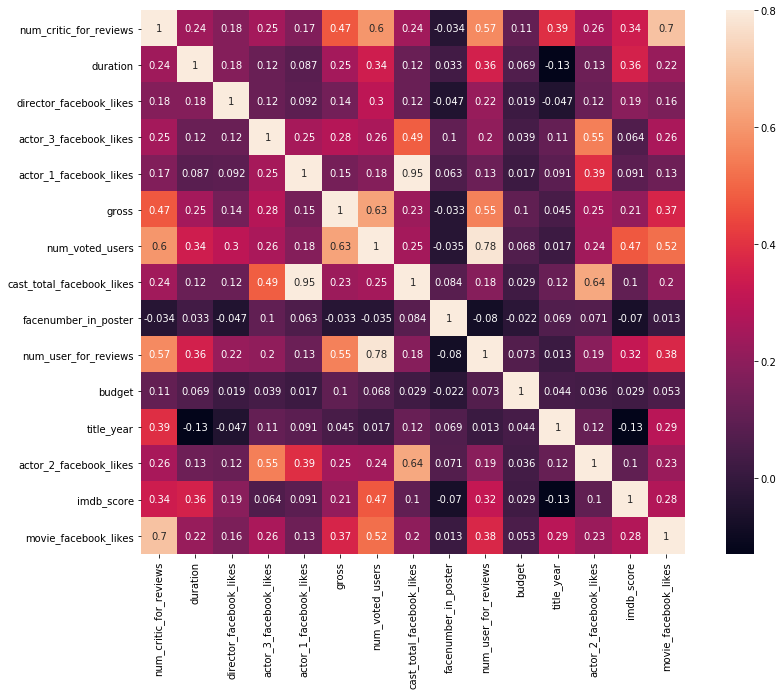

In [40]:
plt.figure(figsize=(15,10))
corrmat = data._get_numeric_data().corr()
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)

We see "actor_1_facebook_likes" is highly correlated with "cast_total_facebook_likes" and also "actor_2_facebook_likes" and "actor_3_facebook_likes" is somewhat related to total. These variable shows multicollinearity occurrence. So we remove one and keep the other and group actor2 and actor3.
Similarly, we drop "num_user_for_reviews" and keep "num_voted_users".

In [41]:
data.drop(["cast_total_facebook_likes"], inplace=True, axis=1)
data.drop(["num_user_for_reviews"], inplace=True, axis=1)

In [42]:
data['other_actor_facebook_likes']=data['actor_2_facebook_likes']+data['actor_3_facebook_likes']

In [43]:
data.drop(['actor_2_facebook_likes'], inplace=True, axis=1)
data.drop(['actor_3_facebook_likes'], inplace=True, axis=1)

We now got rid of numerical NA values, let's now look at categorical NAs.

In [44]:
data.isnull().sum()

color                          2
director_name                  0
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_2_name                   5
actor_1_facebook_likes         0
gross                          0
actor_1_name                   3
movie_title                    0
num_voted_users                0
actor_3_name                  10
facenumber_in_poster           0
plot_keywords                 31
movie_imdb_link                0
language                       3
country                        0
content_rating                51
budget                         0
title_year                     0
imdb_score                     0
movie_facebook_likes           0
other_actor_facebook_likes     0
dtype: int64

#### Content Rating 

In [45]:
data.content_rating.value_counts()

R            1723
PG-13        1314
PG            573
G              91
Not Rated      42
Unrated        24
Approved       17
X              10
NC-17           6
Passed          3
M               2
GP              1
Name: content_rating, dtype: int64

Link: https://en.wikipedia.org/wiki/Motion_Picture_Association_of_America_film_rating_system
As per the history of content rating, M, GP & PG are same. Also X got replaced by NC-17. We group these values into one.

In [46]:
data['content_rating'] = data['content_rating'].replace(to_replace ="M", value ="PG")
data['content_rating'] = data['content_rating'].replace(to_replace ="GP", value ="PG") 
data['content_rating'] = data['content_rating'].replace(to_replace ="X", value ="NC-17")

The most common rating is R, so we replace the remaining ratings and NA to R.

In [47]:
data['content_rating'] = data['content_rating'].replace(to_replace ="Not Rated", value ="R")
data['content_rating'] = data['content_rating'].replace(to_replace ="Approved", value ="R") 
data['content_rating'] = data['content_rating'].replace(to_replace ="Passed", value ="R")
data['content_rating'] = data['content_rating'].replace(to_replace ="Unrated", value ="R")

In [48]:
data['content_rating'] = data.content_rating.fillna('R')

In [49]:
data.content_rating.value_counts()

R        1860
PG-13    1314
PG        576
G          91
NC-17      16
Name: content_rating, dtype: int64

We are now reduced to 5 categories of content_rating what we have now.

#### Color 

In [50]:
data.color.value_counts()

Color               3725
 Black and White     130
Name: color, dtype: int64

We see that the color column is a degenerate predictor because mostly the value is color, so we remove it.

In [51]:
data.drop(["color"], inplace=True, axis=1)

#### Language

In [52]:
data.language.value_counts()

English       3674
French          37
Spanish         26
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Portuguese       5
Korean           5
Norwegian        4
Persian          3
Thai             3
Danish           3
Hebrew           3
Dutch            3
Indonesian       2
Aboriginal       2
Dari             2
Mongolian        1
None             1
Filipino         1
Romanian         1
Dzongkha         1
Vietnamese       1
Icelandic        1
Maya             1
Aramaic          1
Czech            1
Telugu           1
Zulu             1
Arabic           1
Russian          1
Swedish          1
Bosnian          1
Kazakh           1
Hungarian        1
Name: language, dtype: int64

We see that the Language column is a degenerate predictor because mostly the value is English, so we remove it.

In [53]:
data.drop(["language"], inplace=True, axis=1)

#### Country 

In [54]:
len(data)

3857

In [55]:
data.country.value_counts()

USA               3047
UK                 320
France             106
Germany             81
Canada              64
Australia           41
Spain               22
Japan               17
China               14
India               14
Hong Kong           13
Mexico              11
New Zealand         11
Italy               11
South Korea          9
Denmark              9
Ireland              7
Brazil               5
Norway               4
Iran                 4
Thailand             4
Argentina            3
Czech Republic       3
Netherlands          3
Israel               3
Russia               3
South Africa         3
Iceland              2
Belgium              2
Taiwan               2
Romania              2
Hungary              2
Finland              1
Afghanistan          1
Chile                1
Peru                 1
West Germany         1
Indonesia            1
Aruba                1
Greece               1
Official site        1
Poland               1
Philippines          1
Colombia   

We see that most of the movies are from USA and UK, so we group remaining countries as others.

In [56]:
data.country[(data.country != 'USA')&(data.country != 'UK')] = 'Others'

In [57]:
data.country.value_counts()

USA       3047
Others     490
UK         320
Name: country, dtype: int64

#### Names 

In [58]:
print("Total values:",len(data))
print('Unique Director name:',data['director_name'].nunique())
print('Unique Actor 1 name:',data['actor_1_name'].nunique())
print('Unique Actor 2 name:',data['actor_2_name'].nunique())
print('Unique Actor 3 name:',data['actor_3_name'].nunique())
print('Unique Movie Title:',data['movie_title'].nunique())
print('Unique plot keywords:',data['plot_keywords'].nunique())
print('Unique IMDB Link:',data['movie_imdb_link'].nunique())

Total values: 3857
Unique Director name: 1753
Unique Actor 1 name: 1509
Unique Actor 2 name: 2288
Unique Actor 3 name: 2688
Unique Movie Title: 3789
Unique plot keywords: 3759
Unique IMDB Link: 3790


The names predictor, movie title, plot keyword and IMDB links are very diverse, so there is no point to use them to predict IMDB ratings. We remove these columns.

In [59]:
data.drop(['director_name'], inplace=True, axis=1)
data.drop(['actor_1_name'], inplace=True, axis=1)
data.drop(['actor_2_name'], inplace=True, axis=1)
data.drop(['actor_3_name'], inplace=True, axis=1)
data.drop(['movie_title'], inplace=True, axis=1)
data.drop(['plot_keywords'], inplace=True, axis=1)
data.drop(['movie_imdb_link'], inplace=True, axis=1)

#### Data Visualization 

In [60]:
data.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes,other_actor_facebook_likes
0,723.0,178.0,0.0,1000.0,760505847.0,886204,0.0,USA,PG-13,237000000.0,2009.0,7.9,33000,1791.0
1,302.0,169.0,563.0,40000.0,309404152.0,471220,0.0,USA,PG-13,300000000.0,2007.0,7.1,0,6000.0
2,602.0,148.0,0.0,11000.0,200074175.0,275868,1.0,UK,PG-13,245000000.0,2015.0,6.8,85000,554.0
3,813.0,164.0,22000.0,27000.0,448130642.0,1144337,0.0,USA,PG-13,250000000.0,2012.0,8.5,164000,46000.0
5,462.0,132.0,475.0,640.0,73058679.0,212204,1.0,USA,PG-13,263700000.0,2012.0,6.6,24000,1162.0


Text(0.5, 1.0, 'Movie FB Likes vs IMDB score')

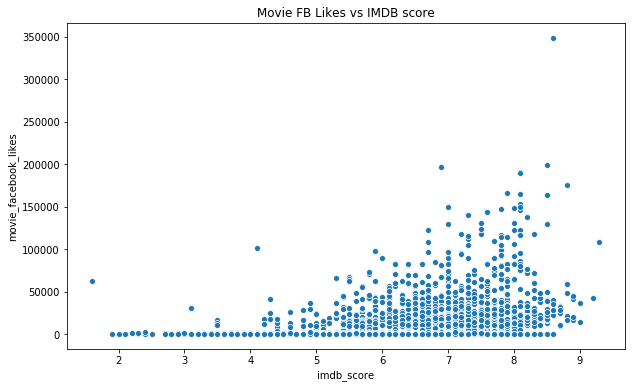

In [61]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="imdb_score", y="movie_facebook_likes", data=data)
plt.title("Movie FB Likes vs IMDB score")

We see that the movies with high facebook likes have high IMDB rating but movies with less likes vary a lot in terms of IMDB ratings.

Text(0.5, 1.0, 'Movie grossing vs IMDB score')

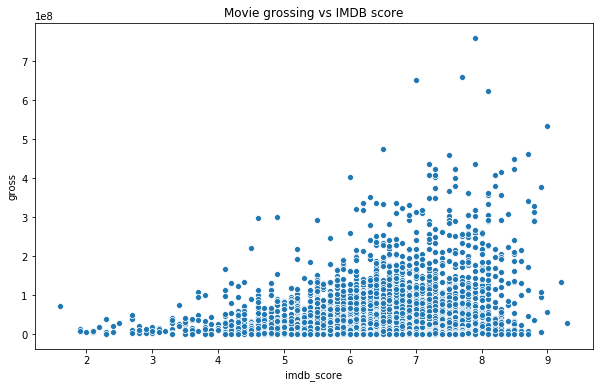

In [62]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="imdb_score", y="gross", data=data)
plt.title("Movie grossing vs IMDB score")

We see that most of the high grossing movies have IMDB ratings between 7 and 8.5, also movies above 8.5 IMDB rating have less grossing. This explains that many critically acclaimed movies do not earn much. 

Text(0.5, 1.0, 'Histogram of movie released')

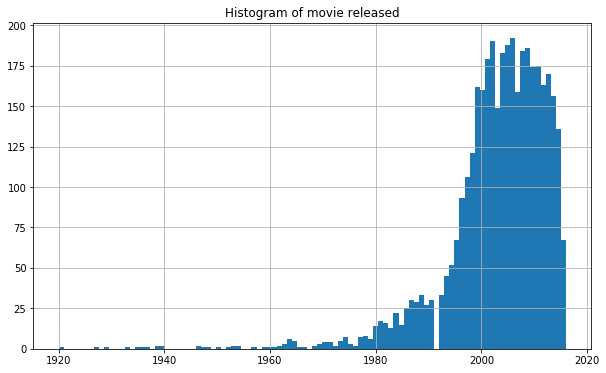

In [63]:
plt.figure(figsize=(10,6))
data.title_year.hist(bins=100)
plt.title("Histogram of movie released")

We see that there are not many records before 1980. We remove them because they won't affect our model much.

In [64]:
data = data[data['title_year']>=1980]

#### Dummy Variables 

In [65]:
data['title_year'] = data['title_year'].apply(str)

In [66]:
data.dtypes

num_critic_for_reviews        float64
duration                      float64
director_facebook_likes       float64
actor_1_facebook_likes        float64
gross                         float64
num_voted_users                 int64
facenumber_in_poster          float64
country                        object
content_rating                 object
budget                        float64
title_year                     object
imdb_score                    float64
movie_facebook_likes            int64
other_actor_facebook_likes    float64
dtype: object

In [67]:
data_new = pd.get_dummies(data)

This concludes data cleaning. 

### Model Building 

In [68]:
from sklearn.feature_selection import VarianceThreshold

In [69]:
threshold_n=0.95
sel = VarianceThreshold(threshold=(threshold_n* (1 - threshold_n) ))
sel_var=sel.fit_transform(data_new)
data_new = data_new[data_new.columns[sel.get_support(indices=True)]] 

In [70]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler 

In [71]:
y=data_new.imdb_score
x=data_new.drop('imdb_score',axis=1)

In [72]:
scl=StandardScaler()
data_new=scl.fit_transform(x)

In [73]:
x_train,x_test,y_train,y_test=train_test_split(data_new,y,test_size=0.2, random_state=0)

#### Linear Regression

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [76]:
y_pred = lm.predict(x_test)

In [77]:
from sklearn import metrics

In [78]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:',metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.6439862726388799
Mean Squared Error: 0.7013225800567444
Root Mean Squared Error: 0.8374500463052972
R-squared: 0.2903175940281125


#### Ridge Regression 

In [79]:
from sklearn.linear_model import Ridge

In [80]:
clf = Ridge(alpha=1.0)
clf.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [81]:
y_pred = clf.predict(x_test)

In [82]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:',metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.6440093212030477
Mean Squared Error: 0.7013163343611921
Root Mean Squared Error: 0.8374463173011104
R-squared: 0.29032391417289694


#### Lasso Regression 

In [83]:
from sklearn import linear_model

In [84]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [85]:
y_pred = clf.predict(x_test)

In [86]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:',metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.6635840542112204
Mean Squared Error: 0.7249365161642866
Root Mean Squared Error: 0.8514320384882674
R-squared: 0.26642217775631505


From the above 3 models we see that we are getting very low RMSE, so our models are mostly not able to predict the IMDB rating of a movie.

Let's try a different approach, converting this regression problem into a classification problem. Now our goal is to build a model, which can help us predict if a movie is good or bad. So instead of predicting an exact score, we only want to know how good or how bad is the movie. Therefore, we bin the score into 4 buckets: less than 4, 4~6, 6~8 and 8~10, which represents bad, OK, good and excellent respectively.

In [87]:
bins = [0, 4, 6, 8, 10]
y_new = pd.cut(y, bins)
y_new = y_new.astype('category').cat.codes

In [88]:
y_new=y_new.astype('str')

In [89]:
x_train,x_test,y_train,y_test=train_test_split(data_new,y_new,test_size=0.2, random_state=0)

In [90]:
acc = {}

#### Logistic Regression 

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [92]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [93]:
y_pred = logisticRegr.predict(x_test)

In [94]:
print("Accuracy:", logisticRegr.score(x_test, y_test))

Accuracy: 0.7104913678618858


In [95]:
acc['Logistic Regression'] = logisticRegr.score(x_test, y_test)

In [96]:
confusion_matrix(y_test, y_pred)

array([[  0,   5,   8,   0],
       [  0,  58, 147,   0],
       [  0,  44, 467,   0],
       [  0,   0,  14,  10]], dtype=int64)

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.54      0.28      0.37       205
           2       0.73      0.91      0.81       511
           3       1.00      0.42      0.59        24

   micro avg       0.71      0.71      0.71       753
   macro avg       0.57      0.40      0.44       753
weighted avg       0.68      0.71      0.67       753



#### KNN 

In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
k_range = range(1,50)
scores={}
score_list=[]

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    score_list.append(metrics.accuracy_score(y_test,y_pred))

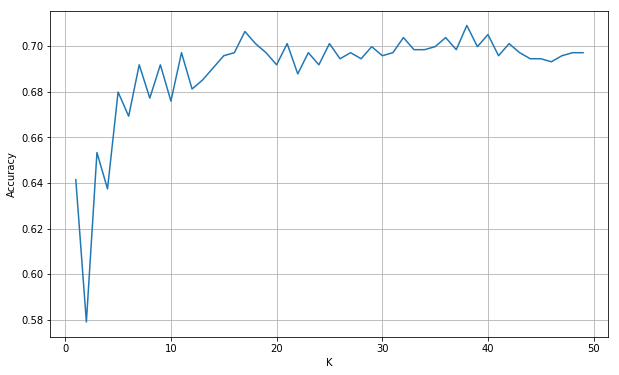

In [100]:
plt.figure(figsize=(10,6))
plt.plot(k_range,score_list)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()

In [101]:
print('Maximum Accuracy:',score_list[score_list.index(max(score_list))])

Maximum Accuracy: 0.7091633466135459


In [102]:
acc['KNN'] = score_list[score_list.index(max(score_list))]

We got maximum accuracy at k = 38.

In [103]:
confusion_matrix(y_test, y_pred)

array([[  0,   7,   6,   0],
       [  0,  79, 126,   0],
       [  0,  68, 443,   0],
       [  0,   0,  21,   3]], dtype=int64)

In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.51      0.39      0.44       205
           2       0.74      0.87      0.80       511
           3       1.00      0.12      0.22        24

   micro avg       0.70      0.70      0.70       753
   macro avg       0.56      0.34      0.37       753
weighted avg       0.68      0.70      0.67       753



#### Decision Tree 

In [105]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

In [106]:
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [107]:
y_predict = model.predict(x_test)
metrics.accuracy_score(y_test, y_predict)

0.6786188579017264

In [108]:
acc['Decision Tree'] = metrics.accuracy_score(y_test, y_predict)

In [109]:
confusion_matrix(y_test, y_pred)

array([[  0,   7,   6,   0],
       [  0,  79, 126,   0],
       [  0,  68, 443,   0],
       [  0,   0,  21,   3]], dtype=int64)

In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.51      0.39      0.44       205
           2       0.74      0.87      0.80       511
           3       1.00      0.12      0.22        24

   micro avg       0.70      0.70      0.70       753
   macro avg       0.56      0.34      0.37       753
weighted avg       0.68      0.70      0.67       753



#### Random Forest 

In [111]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 0)
# Train the model on training data
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [112]:
y_predict = rf.predict(x_test)
metrics.accuracy_score(y_test, y_predict)

0.7782204515272244

In [113]:
acc['Random Forest'] = metrics.accuracy_score(y_test, y_predict)

In [114]:
confusion_matrix(y_test, y_pred)

array([[  0,   7,   6,   0],
       [  0,  79, 126,   0],
       [  0,  68, 443,   0],
       [  0,   0,  21,   3]], dtype=int64)

In [115]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.51      0.39      0.44       205
           2       0.74      0.87      0.80       511
           3       1.00      0.12      0.22        24

   micro avg       0.70      0.70      0.70       753
   macro avg       0.56      0.34      0.37       753
weighted avg       0.68      0.70      0.67       753



#### XGBoost 

In [116]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=0,learning_rate=0.01)
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.01, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=None, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

In [117]:
y_predict = model.predict(x_test)
metrics.accuracy_score(y_test, y_predict)

0.7715803452855245

In [118]:
acc['XGBoost'] = metrics.accuracy_score(y_test, y_predict)

In [119]:
confusion_matrix(y_test, y_pred)

array([[  0,   7,   6,   0],
       [  0,  79, 126,   0],
       [  0,  68, 443,   0],
       [  0,   0,  21,   3]], dtype=int64)

In [120]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.51      0.39      0.44       205
           2       0.74      0.87      0.80       511
           3       1.00      0.12      0.22        24

   micro avg       0.70      0.70      0.70       753
   macro avg       0.56      0.34      0.37       753
weighted avg       0.68      0.70      0.67       753



#### LightGBM 

In [121]:
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [122]:
model = lgb.LGBMClassifier()
model.fit(x_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [123]:
y_predict = model.predict(x_test)
metrics.accuracy_score(y_test, y_predict)

0.7662682602921647

In [124]:
acc['LightGBM'] = metrics.accuracy_score(y_test, y_predict)

In [125]:
confusion_matrix(y_test, y_pred)

array([[  0,   7,   6,   0],
       [  0,  79, 126,   0],
       [  0,  68, 443,   0],
       [  0,   0,  21,   3]], dtype=int64)

In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.51      0.39      0.44       205
           2       0.74      0.87      0.80       511
           3       1.00      0.12      0.22        24

   micro avg       0.70      0.70      0.70       753
   macro avg       0.56      0.34      0.37       753
weighted avg       0.68      0.70      0.67       753



### Accuracy

In [127]:
acc

{'Logistic Regression': 0.7104913678618858,
 'KNN': 0.7091633466135459,
 'Decision Tree': 0.6786188579017264,
 'Random Forest': 0.7782204515272244,
 'XGBoost': 0.7715803452855245,
 'LightGBM': 0.7662682602921647}

We ran 5 models and the best 3 models are: Random Forest, XGBoost and LightGBM. And amongst the three Random Forest should be deployed into production because it gave the highest accuracy of 77.8%.